In [17]:
install.packages("dplyr")
library(dplyr)
library(ggplot2)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [3]:
#download.file("http://datacarpentry.github.io/dc_zurich/data/portal_data_joined.csv","data/portal_data_joined.csv")

surveys_complete <- read.csv(file = "data/portal_data_joined.csv")

Warning message:
“Removed 4048 rows containing missing values (`geom_point()`).”


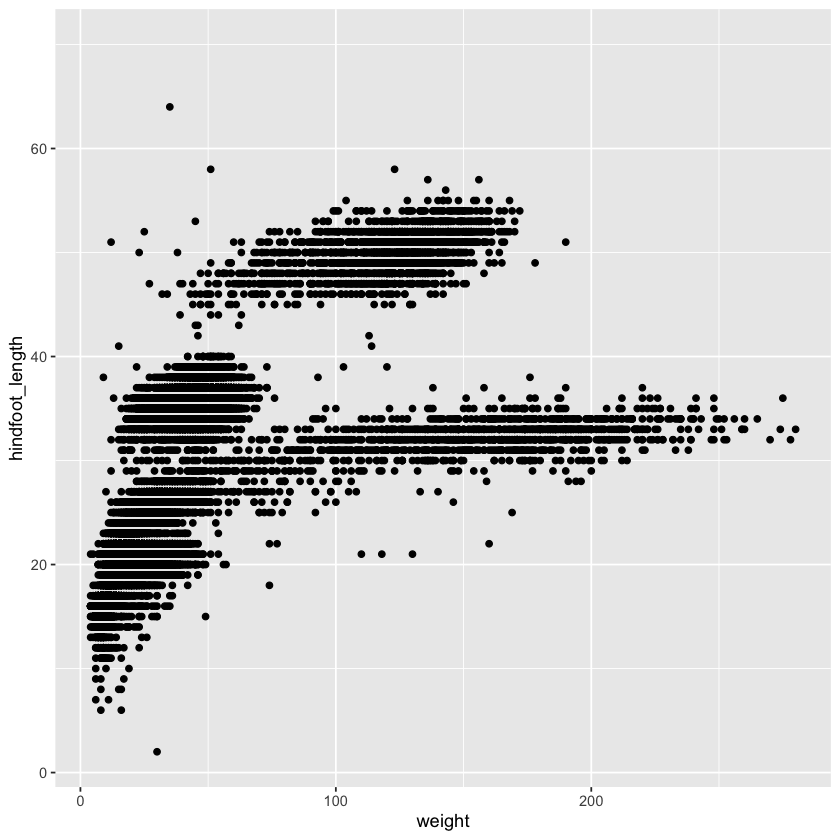

In [7]:
ggplot(surveys_complete, aes(x = weight, y = hindfoot_length)) +
  geom_point()

We can reduce over-plotting by adding some jitter:

Warning message:
“Removed 4048 rows containing missing values (`geom_point()`).”


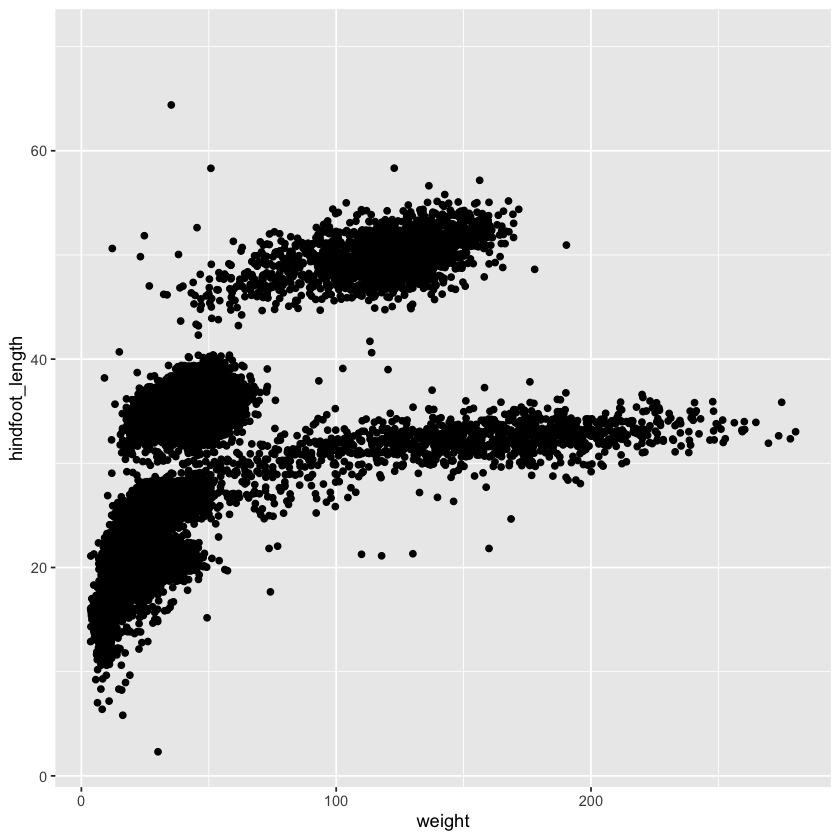

In [8]:
ggplot(surveys_complete, aes(x = weight, y = hindfoot_length)) +
  geom_point(position = position_jitter())

We can add additional aesthetic values according to other properties from our dataset. For instance, if we want to color points differently depending on the species.

Warning message:
“Removed 4048 rows containing missing values (`geom_point()`).”


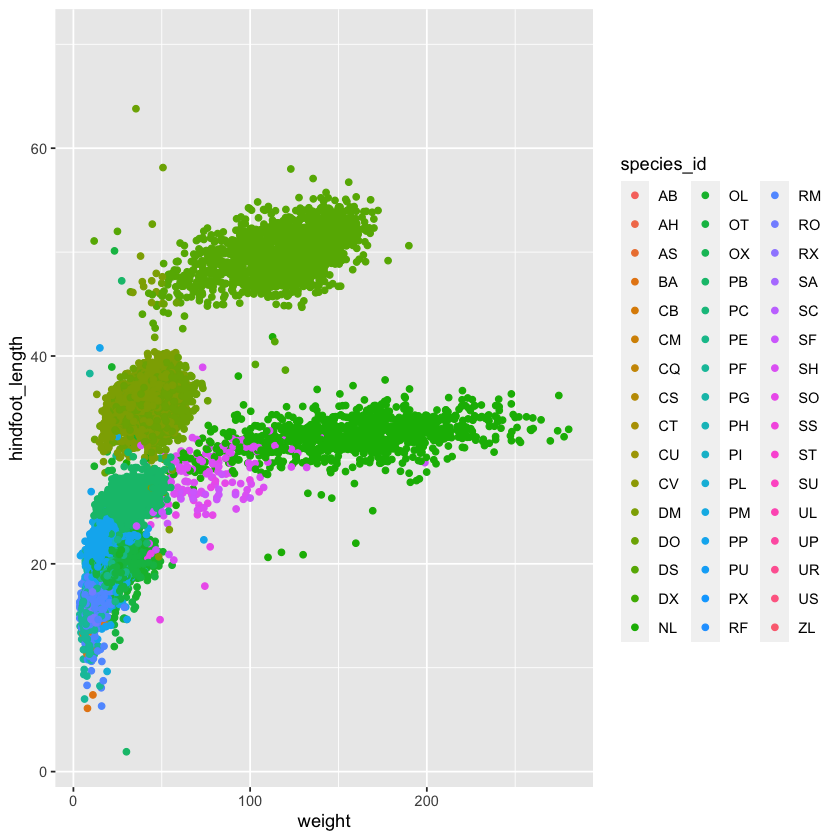

In [9]:
ggplot(surveys_complete, aes(x = weight, y = hindfoot_length, colour = species_id)) +
  geom_point(position = position_jitter())

We can make the points more transparent so we can assess the overplotting.

Warning message:
“Removed 4048 rows containing missing values (`geom_point()`).”


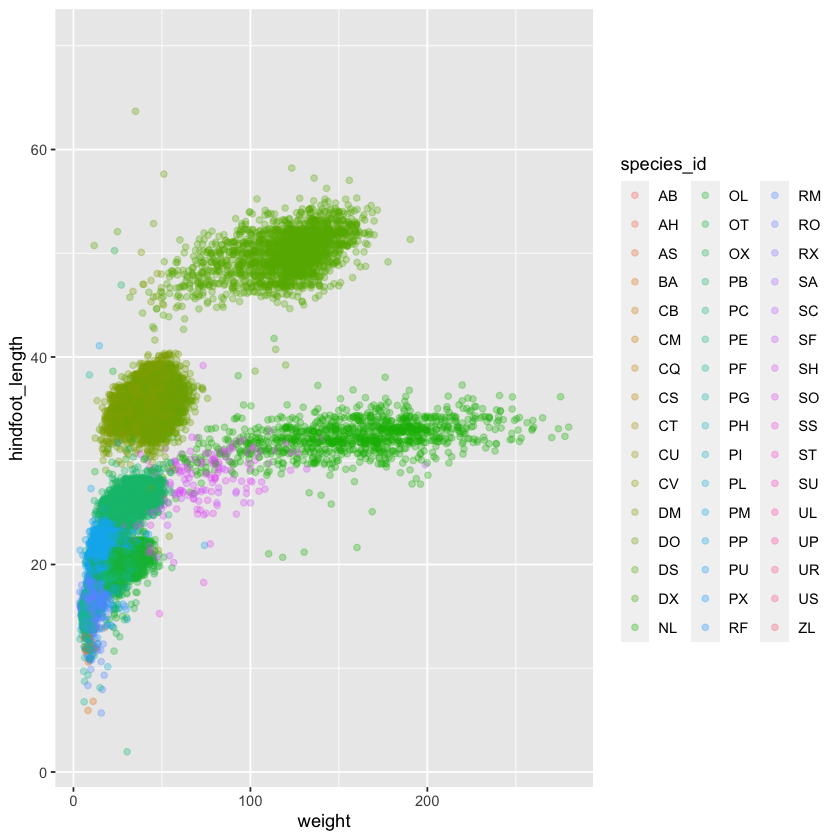

In [10]:
ggplot(surveys_complete, aes(x = weight, y = hindfoot_length, colour = species_id)) +
  geom_point(alpha = 0.3,  position = position_jitter())

Just like we did for the species_id and the colors, we can do the same with using different shapes for

Warning message:
“The shape palette can deal with a maximum of 6 discrete values because
more than 6 becomes difficult to discriminate; you have 24. Consider
specifying shapes manually if you must have them.”
Warning message:
“Removed 25143 rows containing missing values (`geom_point()`).”


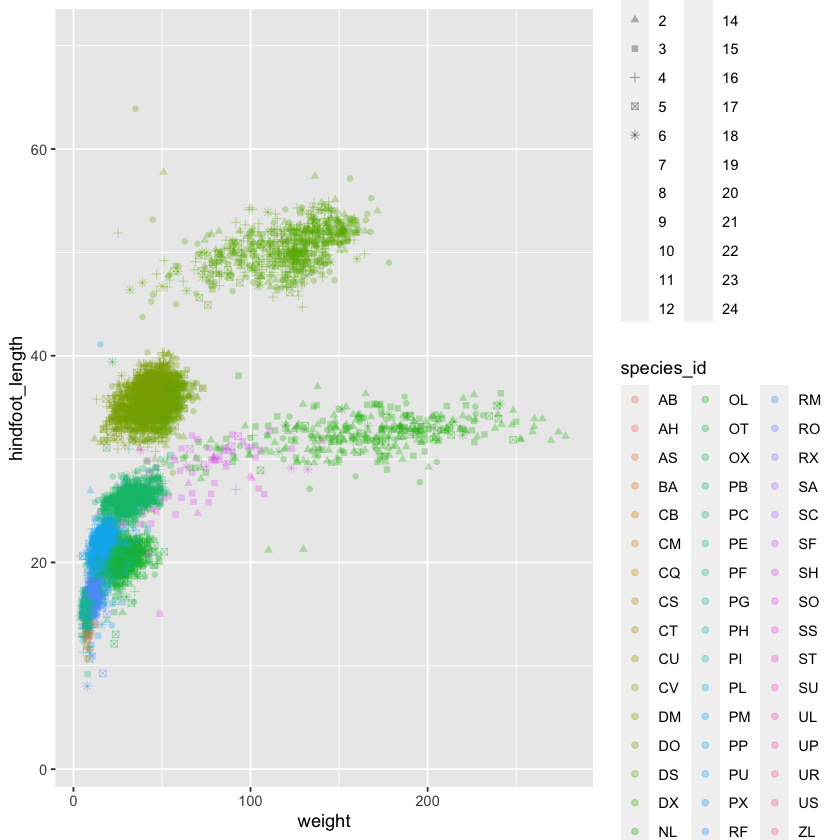

In [11]:
ggplot(surveys_complete, aes(x = weight, y = hindfoot_length, colour = species_id, shape = as.factor(plot_id))) +
  geom_point(alpha = 0.3,  position = position_jitter())

ggplot2 also allows you to calculate directly some statistical

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 4048 rows containing non-finite values (`stat_smooth()`).”
Warning message in qt((1 - level)/2, df):
“NaNs produced”
Warning message in qt((1 - level)/2, df):
“NaNs produced”
Warning message:
“Removed 4048 rows containing missing values (`geom_point()`).”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”


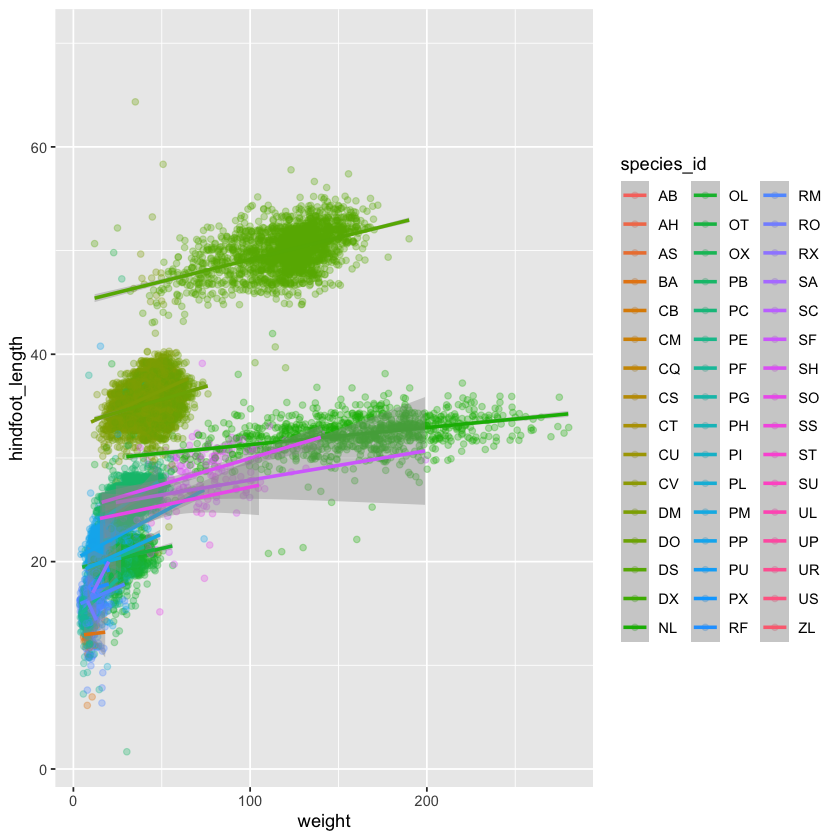

In [12]:
ggplot(surveys_complete, aes(x = weight, y = hindfoot_length, colour = species_id)) +
    geom_point(alpha = 0.3,  position = position_jitter()) + 
    stat_smooth(method = "lm")

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 478 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 478 rows containing missing values (`geom_point()`).”


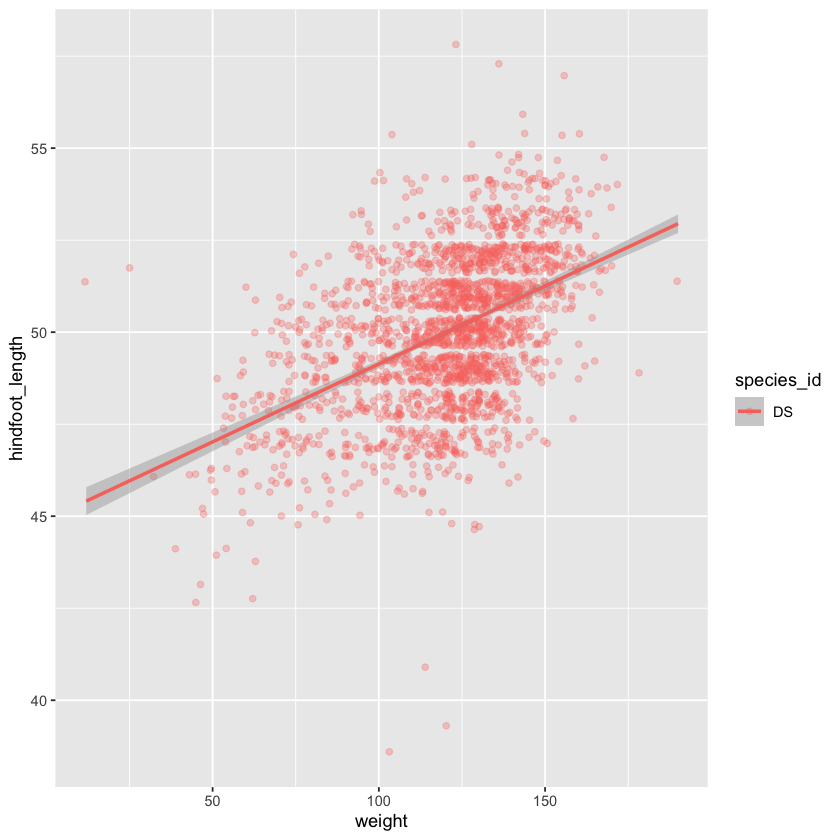

In [18]:
surveys_complete %>%
    filter(species_id == "DS") %>%
    ggplot(aes(x = weight, y = hindfoot_length, colour = species_id)) +
    geom_point(alpha = 0.3,  position = position_jitter()) + stat_smooth(method = "lm")

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 478 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 478 rows containing missing values (`geom_point()`).”


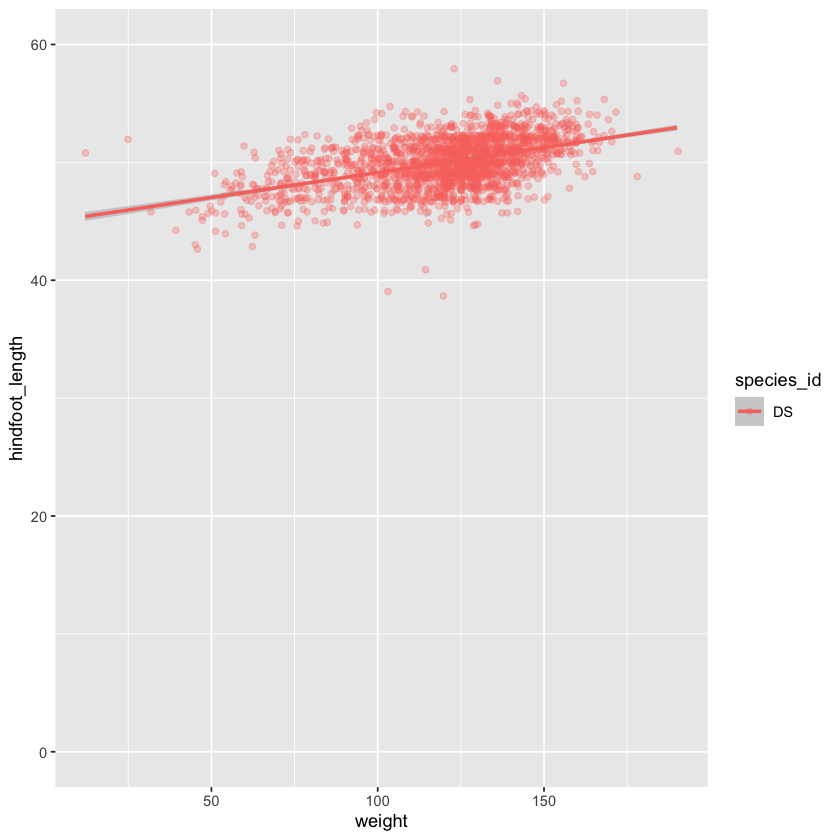

In [19]:
ggplot(subset(surveys_complete, species_id == "DS"), 
       aes(x = weight, y = hindfoot_length, colour = species_id)) +
    geom_point(alpha = 0.3,  position = position_jitter()) + stat_smooth(method = "lm") +
    ylim(c(0, 60))

Using ylim subsets the data to be represented:

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 32716 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 32728 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 11 rows containing missing values (`geom_smooth()`).”


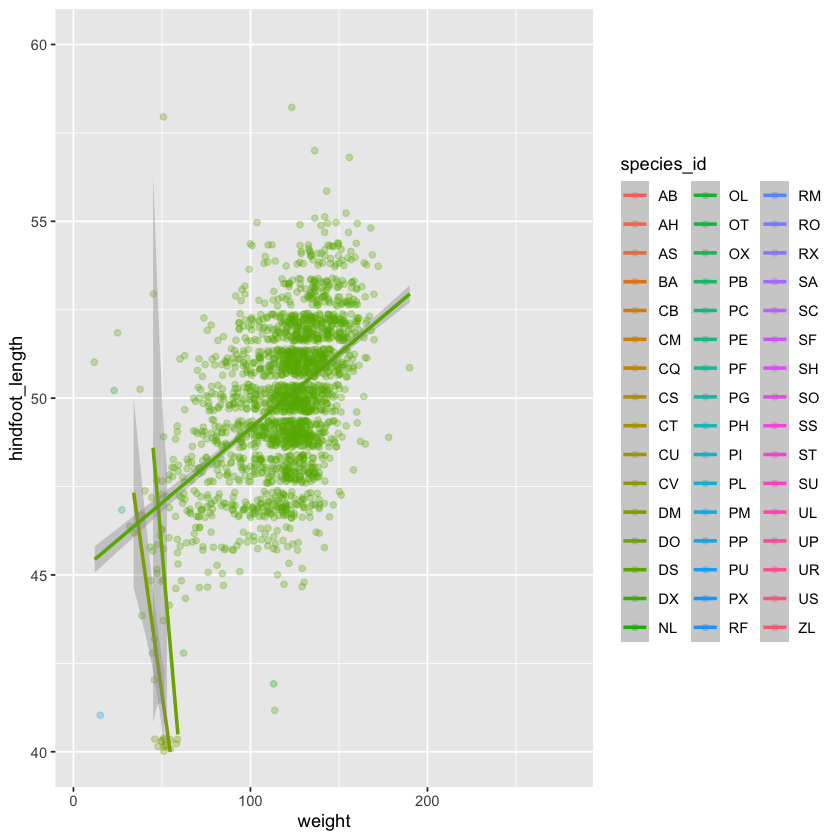

In [20]:
ggplot(surveys_complete,
       aes(x = weight, y = hindfoot_length, colour = species_id)) +
  geom_point(alpha = 0.3,  position = position_jitter()) + stat_smooth(method = "lm") +
  ylim(c(40, 60))

while setting limits with coord_cartesian acts a magnifying glass:

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 4048 rows containing non-finite values (`stat_smooth()`).”
Warning message in qt((1 - level)/2, df):
“NaNs produced”
Warning message in qt((1 - level)/2, df):
“NaNs produced”
Warning message:
“Removed 4048 rows containing missing values (`geom_point()`).”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”


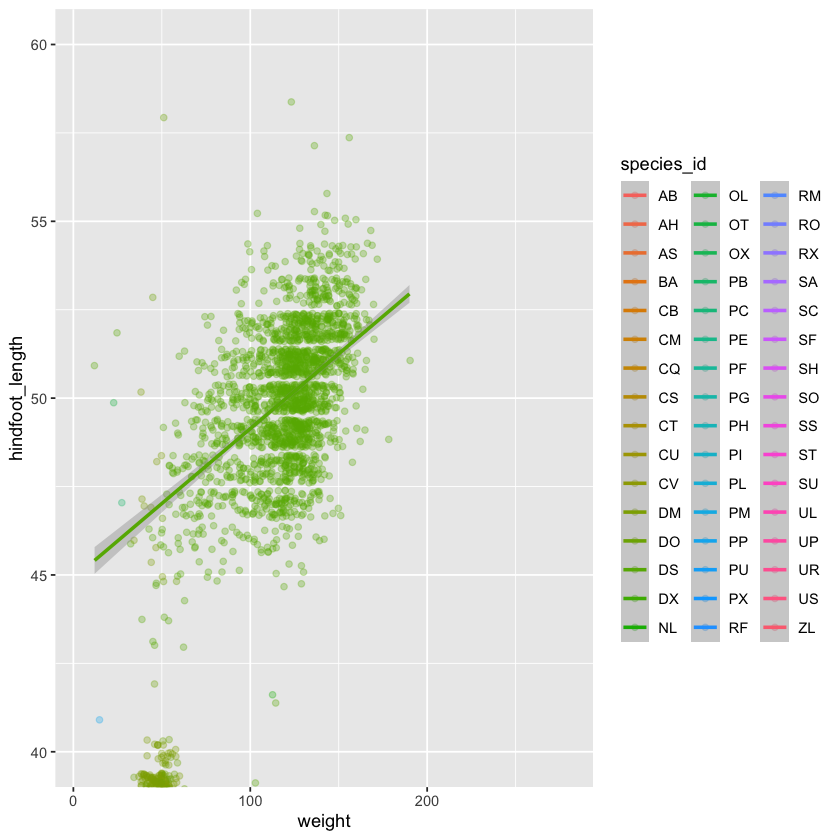

In [21]:
ggplot(surveys_complete,
       aes(x = weight, y = hindfoot_length, colour = species_id)) +
  geom_point(alpha = 0.3,  position = position_jitter()) + stat_smooth(method = "lm") +
  coord_cartesian(ylim = c(40, 60))

### Boxplot

Visualising the distribution of weight within each species.

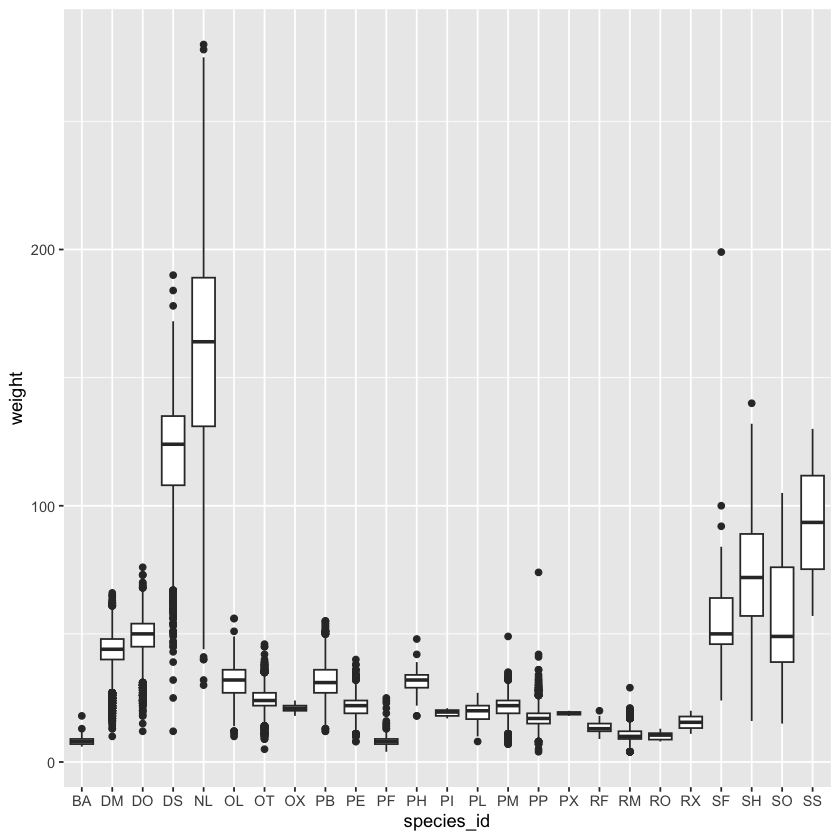

In [22]:
ggplot(subset(surveys_complete, !is.na(weight)), aes(x = species_id, y = weight)) +
  geom_boxplot()

By adding points to boxplot, we can see particular measurements and the abundance of measurements.

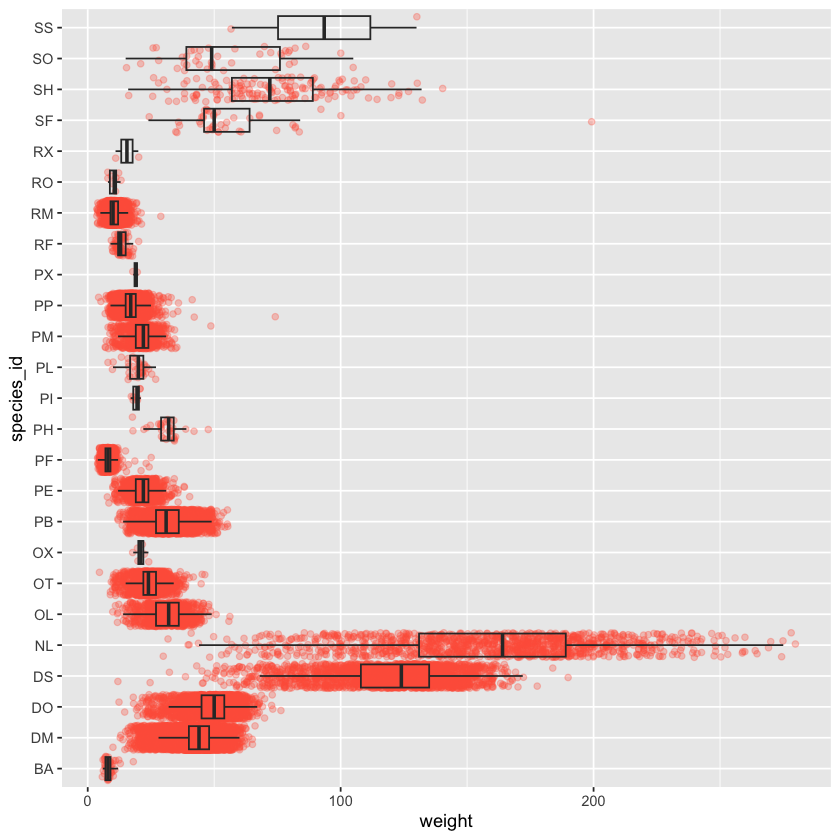

In [23]:
ggplot(subset(surveys_complete, !is.na(weight)), aes(x = species_id, y = weight)) +
  geom_point(alpha=0.3, color="tomato", position = "jitter") +
  geom_boxplot(alpha=0) + coord_flip()

In [25]:
head(surveys_complete)

record_id month day year plot_id species_id sex hindfoot_length weight
1 1         7     16  1977 2       NL         M   32              NA    
2 2         7     16  1977 3       NL         M   33              NA    
3 3         7     16  1977 2       DM         F   37              NA    
4 4         7     16  1977 7       DM         M   36              NA    
5 5         7     16  1977 3       DM         M   35              NA    
6 6         7     16  1977 1       PF         M   14              NA    
  genus       species  taxa   plot_type               
1 Neotoma     albigula Rodent Control                 
2 Neotoma     albigula Rodent Long-term Krat Exclosure
3 Dipodomys   merriami Rodent Control                 
4 Dipodomys   merriami Rodent Rodent Exclosure        
5 Dipodomys   merriami Rodent Long-term Krat Exclosure
6 Perognathus flavus   Rodent Spectab exclosure

In [26]:
colnames(surveys_complete)

[1] "record_id"       "month"           "day"             "year"           
 [5] "plot_id"         "species_id"      "sex"             "hindfoot_length"
 [9] "weight"          "genus"           "species"         "taxa"           
[13] "plot_type"

### Challenge
- Create boxplot for hindfoot_length, and change the color of the points.
- Replace the boxplot by a violin plot
- Add the layer coord_flip()

Warning message:
“Removed 1545 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 1545 rows containing missing values (`geom_point()`).”


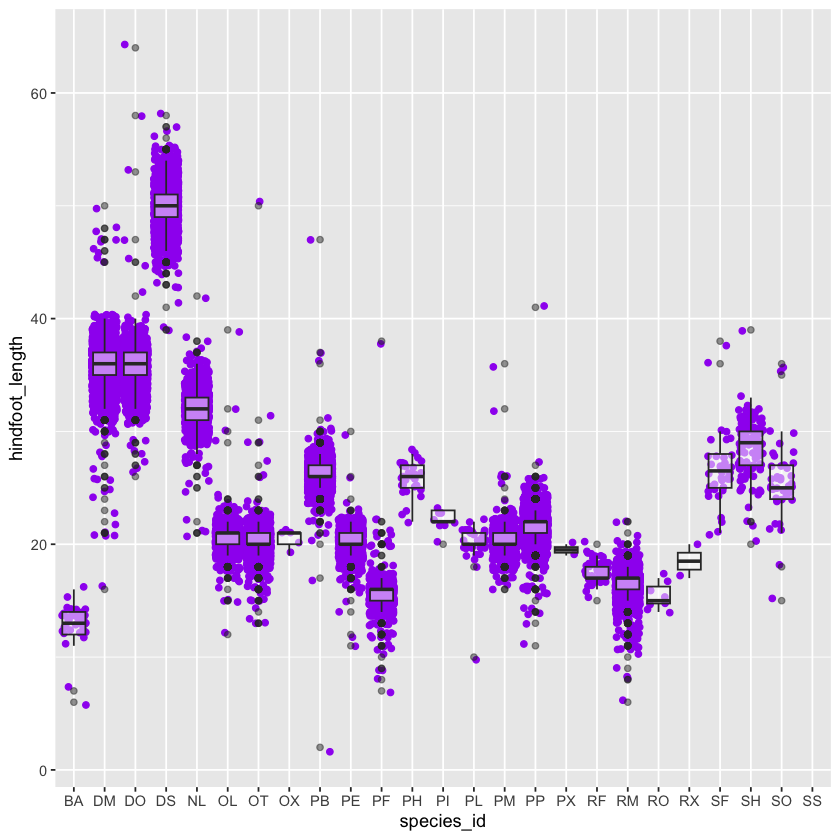

In [32]:
ggplot(subset(surveys_complete, !is.na(weight)), aes(x = species_id, y = hindfoot_length)) +
  geom_point(color="purple", position = "jitter") +
  geom_boxplot(alpha=0.5)

Warning message:
“Removed 1545 rows containing non-finite values (`stat_ydensity()`).”
Warning message:
“Removed 1545 rows containing missing values (`geom_point()`).”


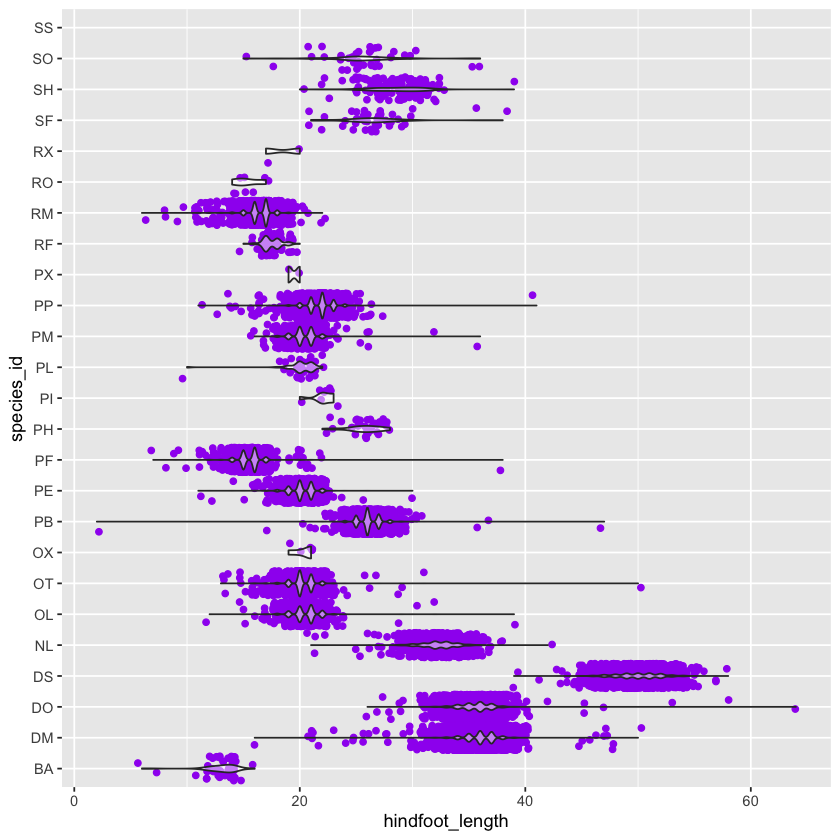

In [34]:
ggplot(subset(surveys_complete, !is.na(weight)), aes(x = species_id, y = hindfoot_length)) +
  geom_point(color="purple", position = "jitter") +
  geom_violin(alpha=0.5) + coord_flip()

## Faceting

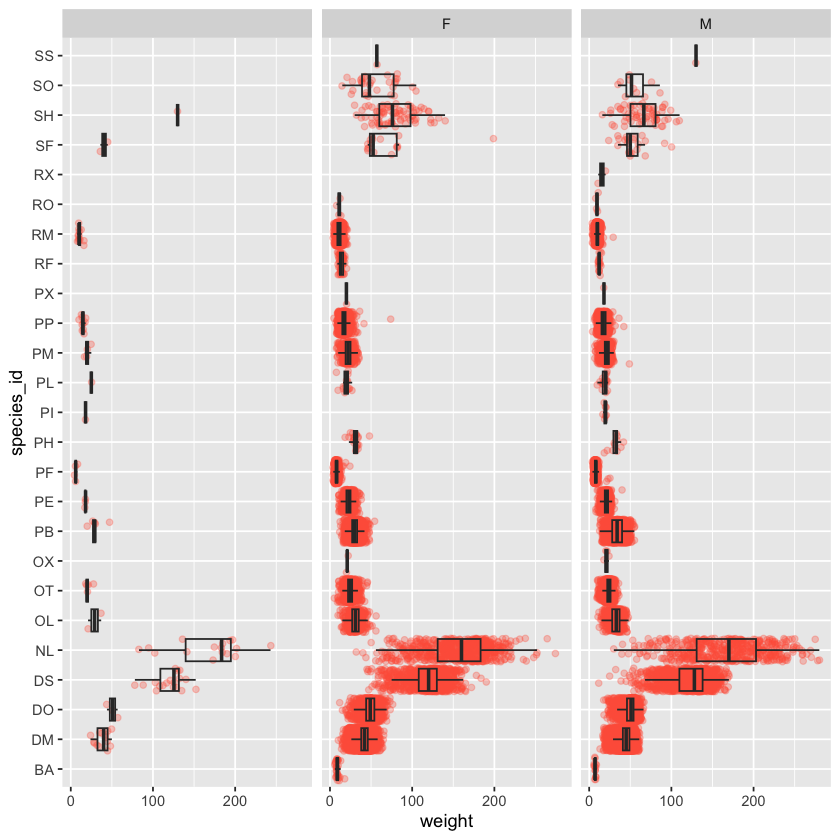

In [36]:
ggplot(subset(surveys_complete, !is.na(weight)), aes(species_id, weight)) +
  geom_point(alpha=0.3, color="tomato", position = "jitter") +
  geom_boxplot(alpha=0) + coord_flip() + facet_wrap( ~ sex)

### Challenge
- Modify the data frame so we only look at males and females
- Change the colors, so points for males and females are different
- Change the data frame to only plot three species of your choosing

Warning message:
“Removed 521 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 521 rows containing missing values (`geom_point()`).”


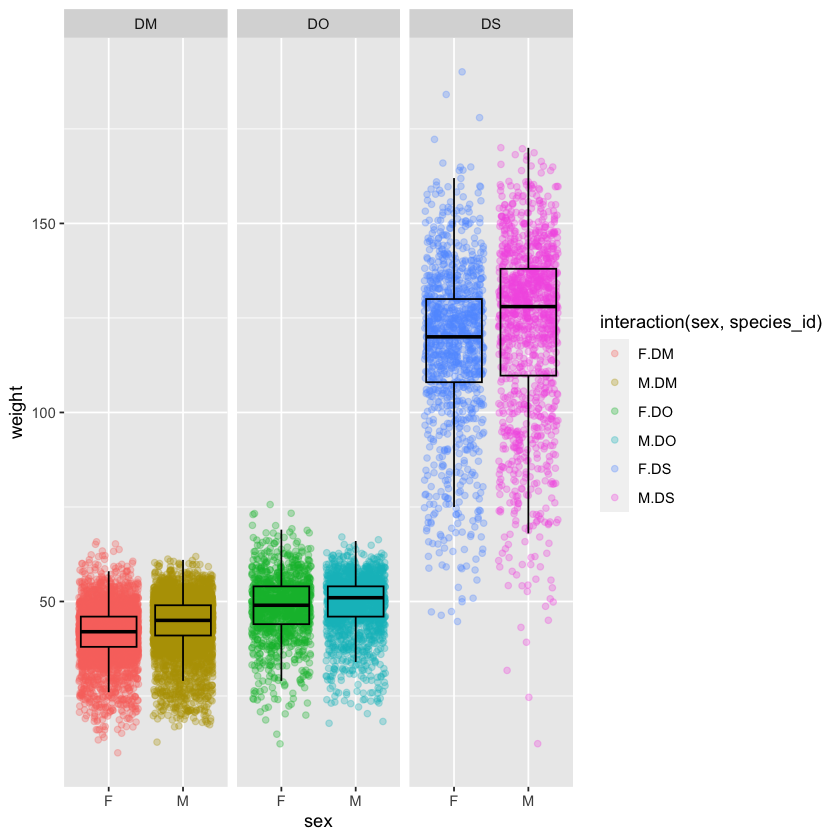

In [45]:
ggplot(subset(surveys_complete, species_id %in% c("DO", "DM", "DS") & sex %in% c("F", "M")),
       aes(x = sex, y = weight,  colour = interaction(sex, species_id))) + facet_wrap( ~ species_id) +
       geom_point(alpha = 0.3, position = "jitter") +
       geom_boxplot(alpha = 0, colour = "black")

## Barplot

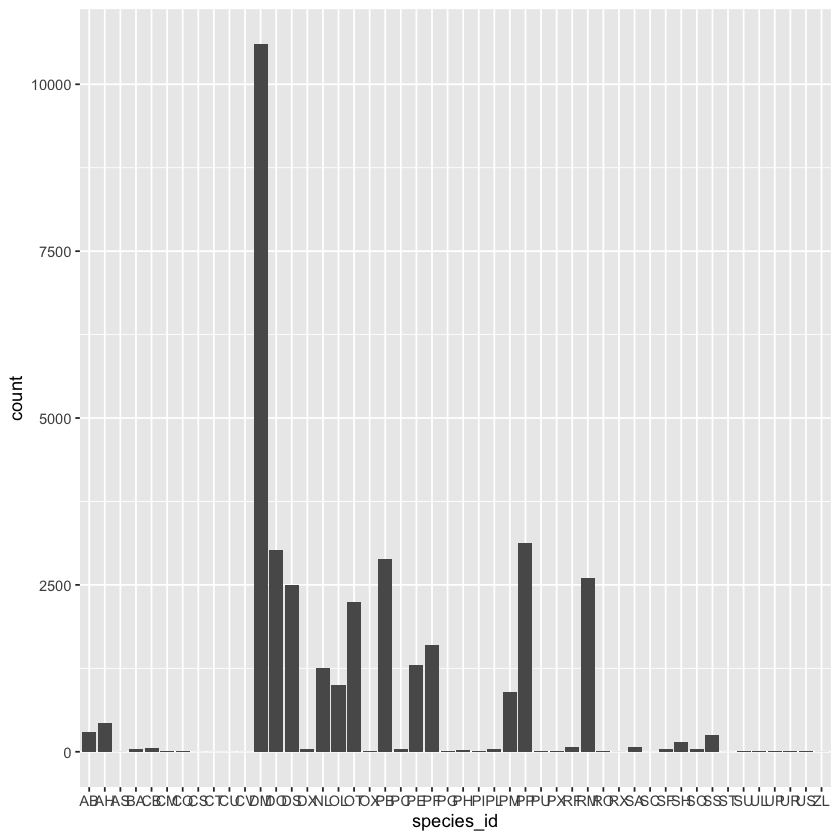

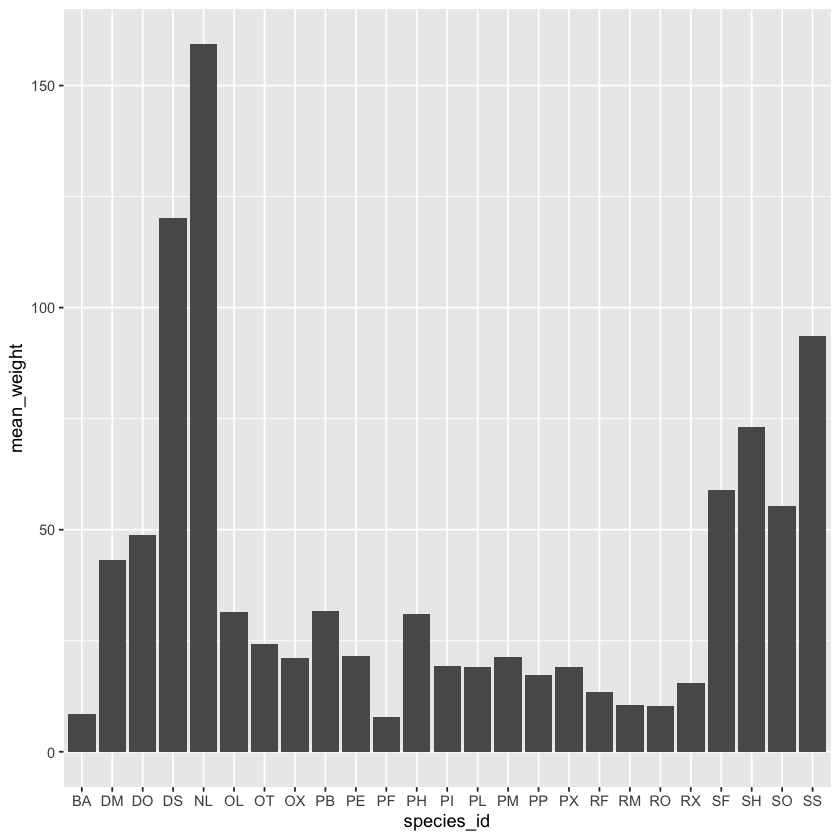

In [47]:
ggplot(surveys_complete, aes(species_id)) + geom_bar()

surveys_complete %>%
  filter(!is.na(weight)) %>%
  group_by(species_id) %>%
  summarize(mean_weight = mean(weight)) %>%
  ggplot(aes(x = species_id, y = mean_weight)) + geom_bar(stat = "identity")

### Challenge
- Repeat the same thing on the hindfoot length instead of the weight

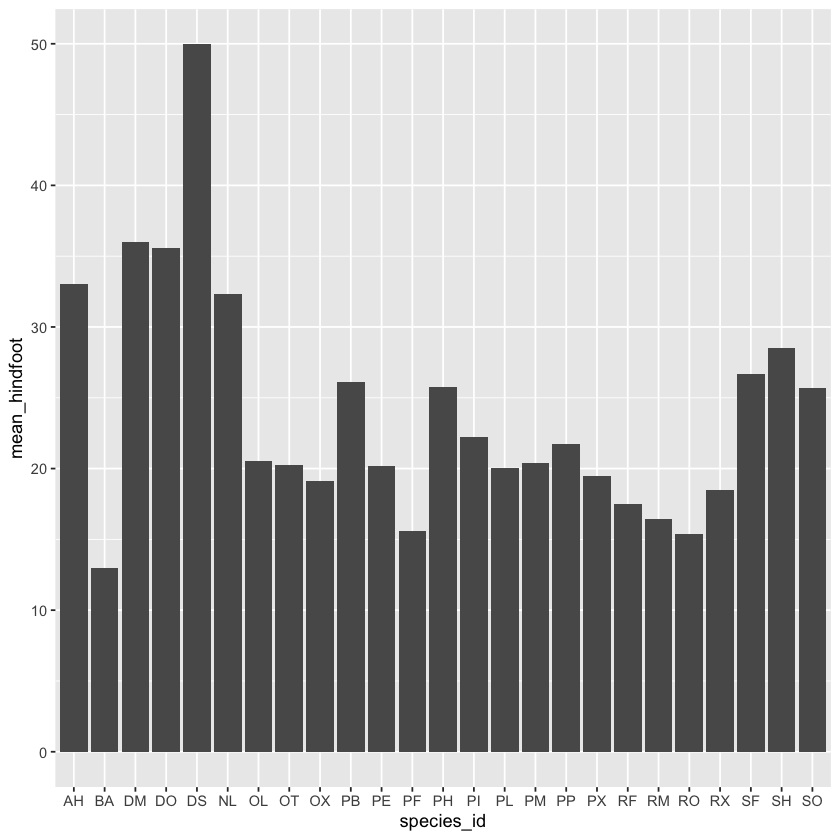

In [48]:
surveys_complete %>%
  filter(!is.na(hindfoot_length)) %>%
  group_by(species_id) %>%
  summarize(mean_hindfoot = mean(hindfoot_length)) %>%
  ggplot(aes(x = species_id, y = mean_hindfoot)) + geom_bar(stat = "identity")

## Plotting time series data

Let’s calculate number of counts per year for each species. To do that we need to group data first and count records within each group.

In [50]:
yearly_counts <- surveys_complete %>%
                    group_by(year, species_id) %>%
                    summarise(count=n())

`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.


Timelapse data can be visualised as a line plot with years on x axis and counts on y axis.

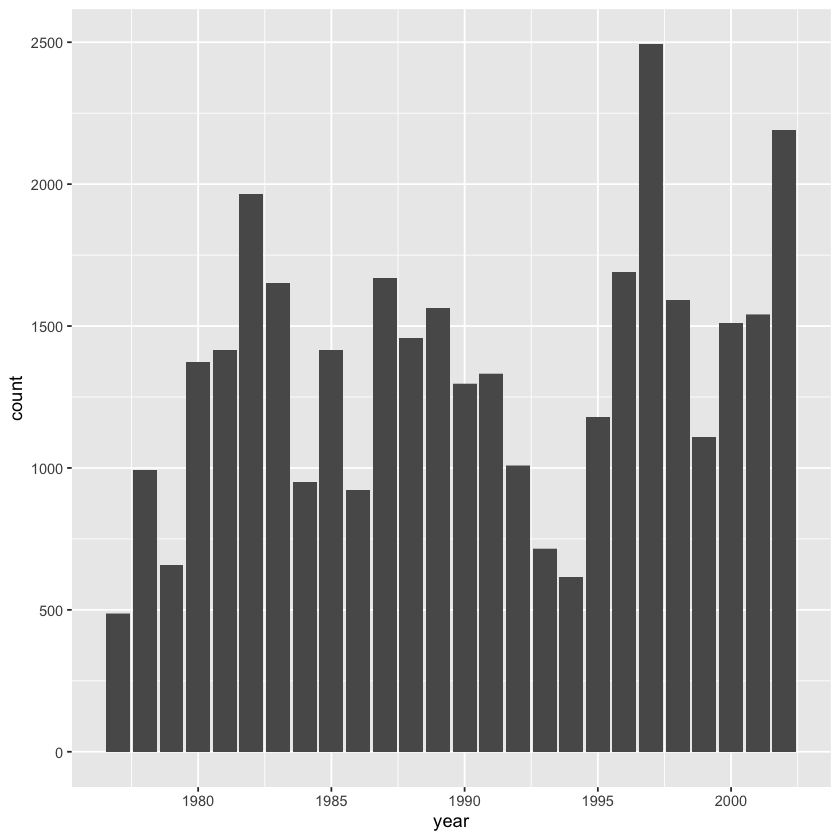

In [51]:
ggplot(yearly_counts, aes(x=year, y=count)) +
  geom_bar(stat = "identity")

This is the plot data for all the species together. We need to tell ggplot to split graphed data by species_id

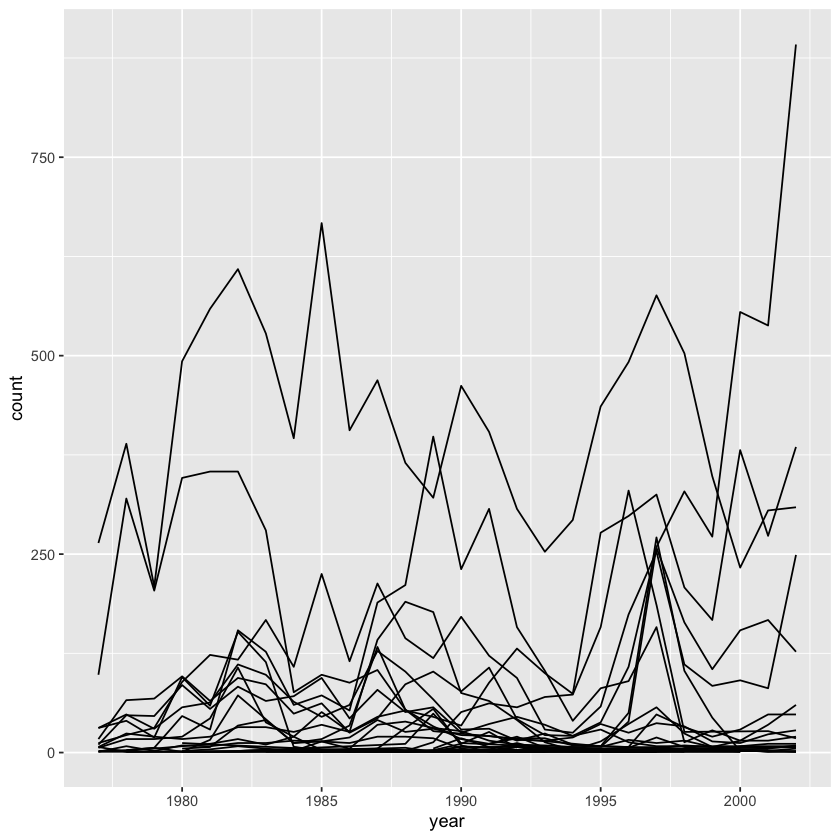

In [52]:
ggplot(yearly_counts, aes(x=year, y=count, group=species_id)) +
  geom_line()

We will be able to distiguish species in the plot if we add colors.

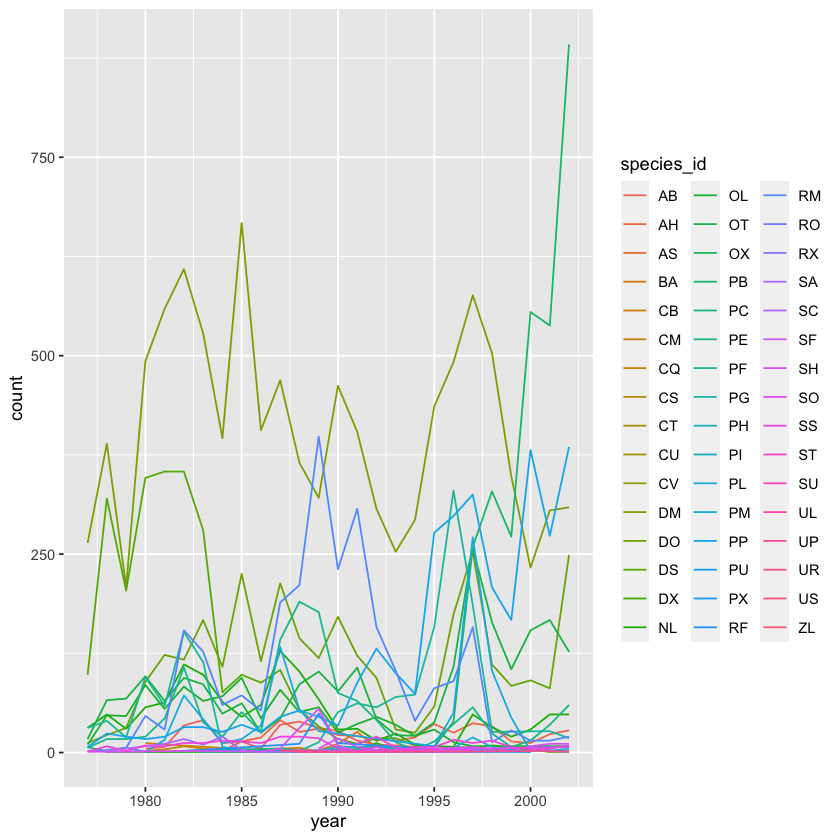

In [53]:
ggplot(yearly_counts, aes(x=year, y=count, group=species_id, color=species_id)) +
  geom_line()

### Challenge
1. Draw the yearly counts for the species DO, DS, DM
2. Draw the yearly counts for each plot type
3. Draw the yearly counts for all taxa but Rodents
4. Draw the yearly counts for species that have been captured more than 2000 times over the course of the surveys (difficult)
5. Draw the yearly counts for the species that have been captured at least 300 times in one year (difficult)

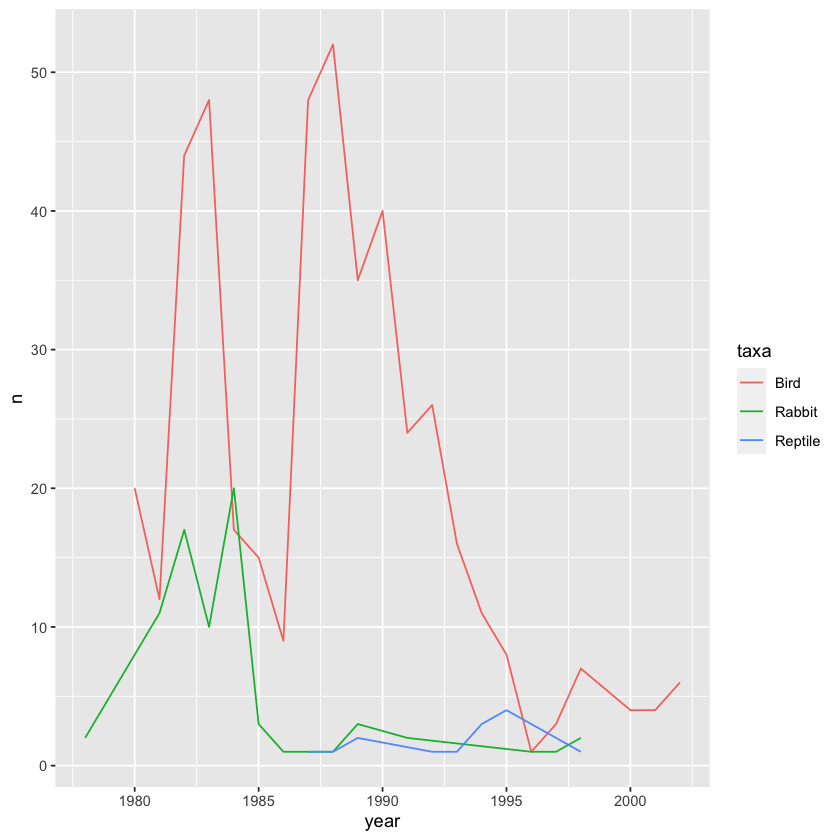

In [55]:
surveys_complete %>%
  group_by(taxa, year) %>%
  tally %>%
  filter(taxa != "Rodent") %>%
  ggplot(aes(x = year, y = n, group = taxa, color = taxa)) +
  geom_line()

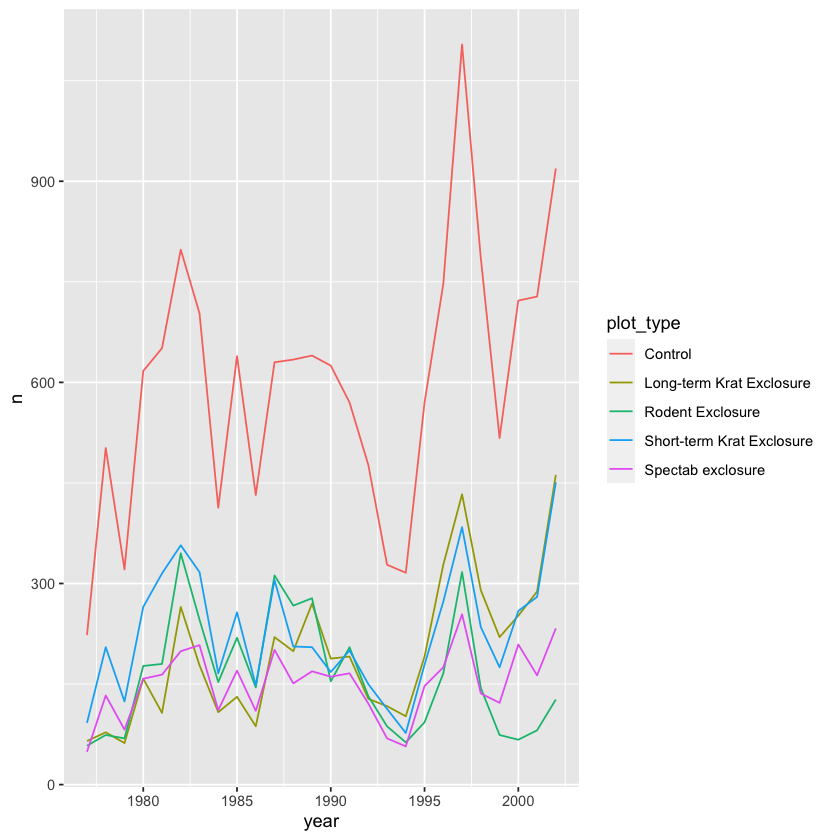

In [56]:
surveys_complete %>%
  group_by(plot_type, year) %>%
  tally %>%
  ggplot(aes(x = year, y = n, group = plot_type, color = plot_type)) +
  geom_line()

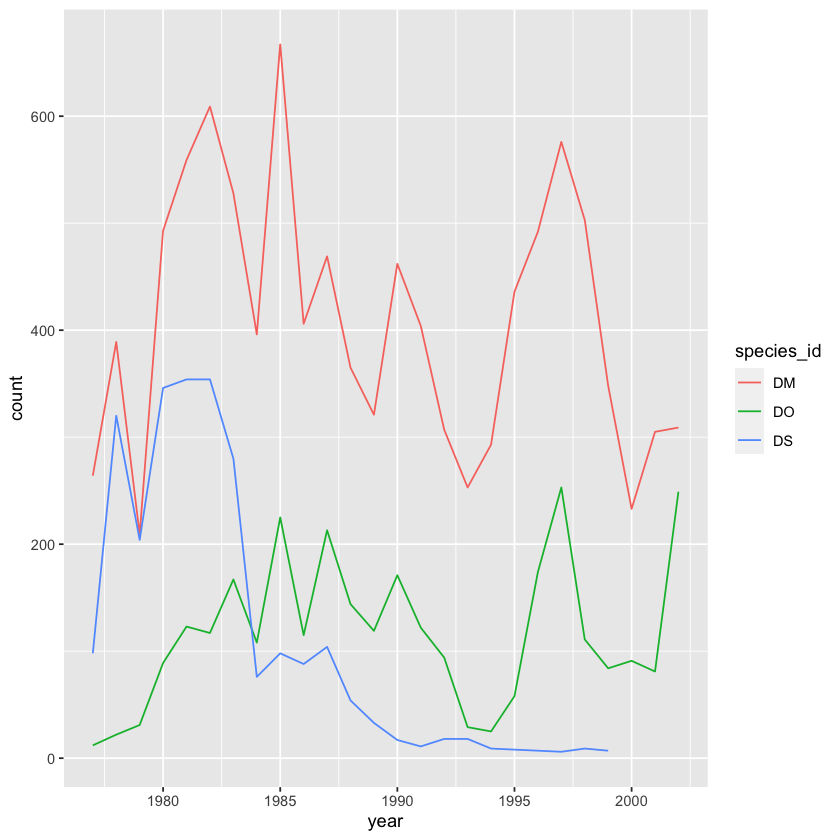

In [57]:
### Easy

yearly_counts %>%
  filter(species_id %in% c("DO", "DS", "DM")) %>%
  ggplot(aes(x = year, y = count, group = species_id, color = species_id)) +
  geom_line()

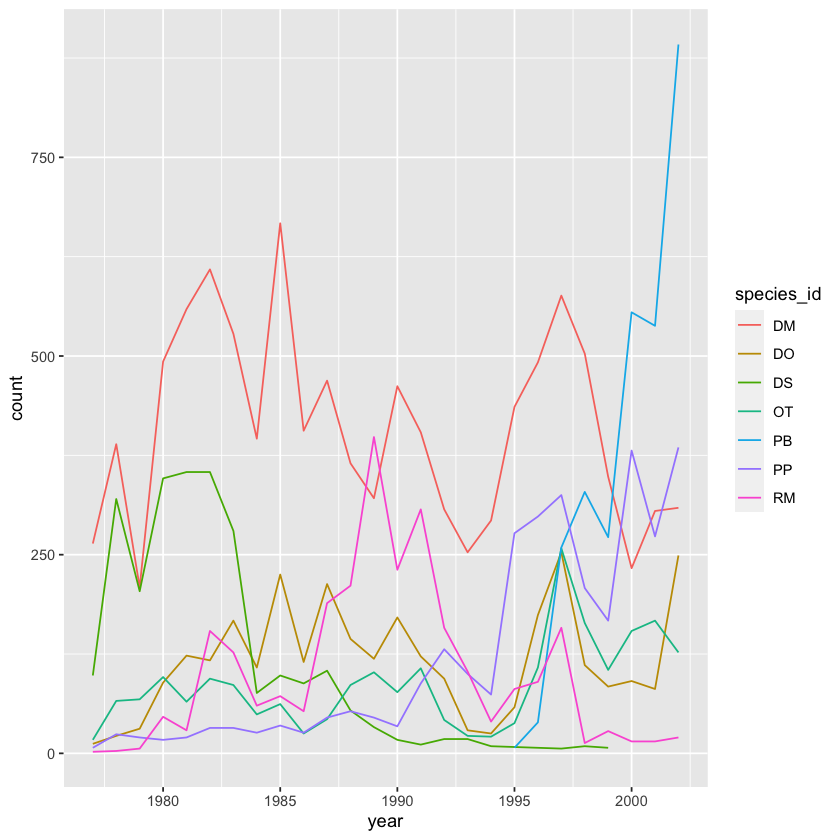

In [58]:
### Difficult

sp_totals <- surveys_complete %>%
  group_by(species_id) %>%
  summarise(count = n()) %>%
  filter(count > 2000) %>%
  .$species_id

yearly_counts %>%
  filter(species_id %in% sp_totals) %>%
  ggplot(aes(x = year, y = count, group = species_id, color = species_id)) +
  geom_line()

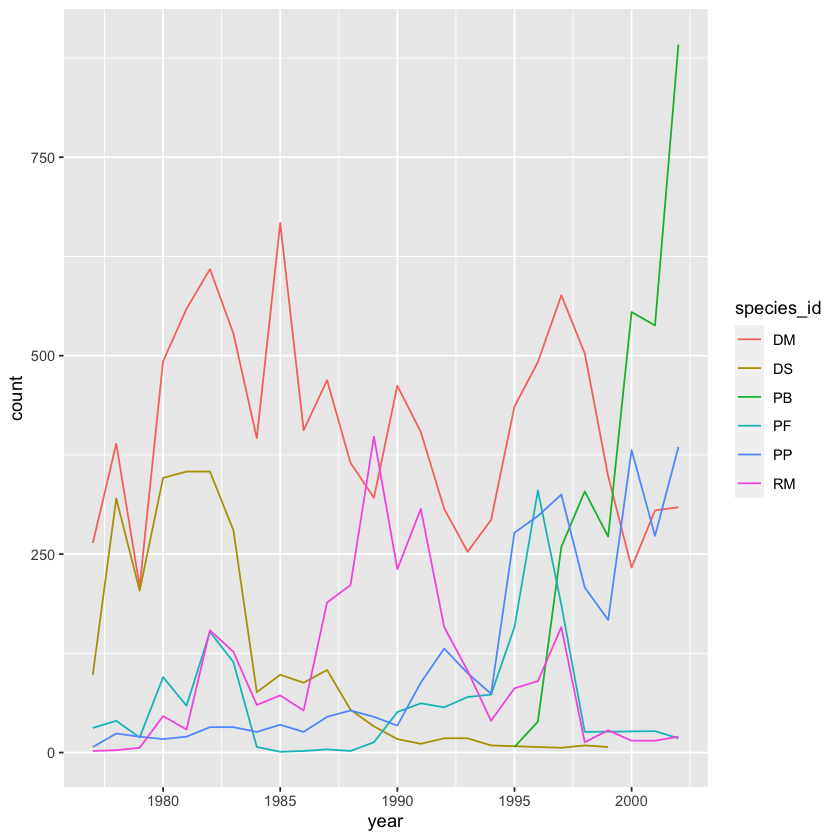

In [59]:
### More difficult

sp_250 <- yearly_counts %>%
  filter(count >=  300) %>%
  ungroup %>%
  select(species_id) %>%
  unique

yearly_counts %>%
  filter(species_id %in% sp_250$species_id) %>%
  ggplot(aes(x = year, y = count, group = species_id, color = species_id)) +
  geom_line()

### Resources for going further
- The ggplot2 documentation: http://docs.ggplot2.org/
- The R cookbook website: http://www.cookbook-r.com/
- customizing the aspect of your plots with themes: http://docs.ggplot2.org/dev/vignettes/themes.html